## Assignment 2.3
## Unsupervised machine learning: K-means clustering
Clustering is the grouping of a set of observations into subsets such that the observations in a single subset are similar to each other. There are several applications of clustering: grouping of documents of the similar type together, classification of plants and animals given their features, arranging books of similar subjects together in library and so on. There are various ways to perform clustering in machine learning.

Let's focus on clustering with <b> K-means </b> in this assignment.

<b> K-means </b> is an unsupervised clustering algorithm, which is used to classify the data into K number of groups or clusters. It assigns each data point to one of the K groups based upon the features provided.
<br> Steps:
    <br> 1. <b>Initialization of centroids:</b> First, the random centroids are choosen for each of the clusters based on the number of clusters you want to find.
    <br> 2. <b> Assignment of data points to clusters:</b> Each data points are assigned to the specific cluster nearest to it using the euclidean distance between data points and centroids.
    <br> 3. <b> Compute new centroids: </b> Take the average of observations in each cluster and change the centroid to the mean value.
    <br> 4. <b> Repeat steps: </b> Repeat steps 2 and 3 until you cannot encounter further change in the centroid value. 

### Exercise 1
Import the packages:
<br>1. Import numpy as np, pandas as pd, sklearn metrics as sm and matplotlib.pyplot as plt.
<br>2. Import KMeans from sklearn.cluster.
<br>3. Import Axes3D from mpl_toolkits.mplot3d.
<br>4. Import datasets from sklearn.

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris



In [ ]:
### INTENTIONALLY LEFT BLANK ###

In [98]:
%matplotlib inline

We will use the [Iris flower dataset](https://gist.github.com/netj/8836201#file-iris-csv) for visualizing k-means. The dataset incorporates a set of 150 records under five different attributes: petal length, petal width, sepal length, sepal width and variety.

### Exercise 2
Load the iris dataset directly from scikit-learn and assign it to the iris vaiable below.

In [2]:
iris = None
# YOUR CODE HERE
iris= datasets.load_iris()

In [ ]:
### INTENTIONALLY LEFT BLANK ###

Let's now assign the column names to iris data.

In [4]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

Let's display some rows of our data x along with the column name.

In [5]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Excercise 3
Use iloc to get the value of Petal width which is in column 3.

In [6]:
petal_width = x.iloc[:,3].values
# YOUR CODE HERE

print(petal_width)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


<font size="4"> You must get this as an output: </font>
<br> <font size="2">[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 <br>0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 <br>0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 <br>1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 <br>1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 <br>1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 <br>1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 <br>1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 <br>2.5 2.3 1.9 2.  2.3 1.8]
 </font>

In [ ]:
### INTENTIONALLY LEFT BLANK ###

### Exercise 4 
Get all the values of petal width, sepal length and petal length.
<br>(As above, fetch all the values from column 3, 0 and 2 using iloc and assign it to variables X, Y and Z respectively.)

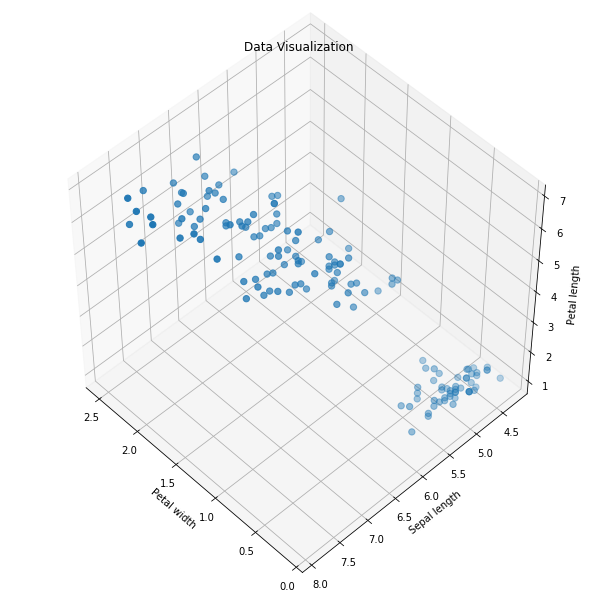

In [10]:
# Create a colormap
colormap = np.array(['red', 'green', 'blue'])

# Set the size of the plot
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=136)

X = x.iloc[:,3].values
Y = x.iloc[:,0].values
Z = x.iloc[:,2].values

# YOUR CODE HERE


ax.scatter(X, Y, Z, s=40)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Data Visualization")
plt.show()

In [ ]:
### INTENTIONALLY LEFT BLANK ###

### Exercise 5
Create KMeans model from scikit-learn with 2 clusters.

In [13]:
kmeans = KMeans(n_clusters=2)
# YOUR CODE HERE

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
### INTENTIONALLY LEFT BLANK ###

### Exercise 6
Predict the output from KMeans model

In [15]:
predicted = kmeans.predict(x)
# YOUR CODE HERE
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
### INTENTIONALLY LEFT BLANK ###

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator.

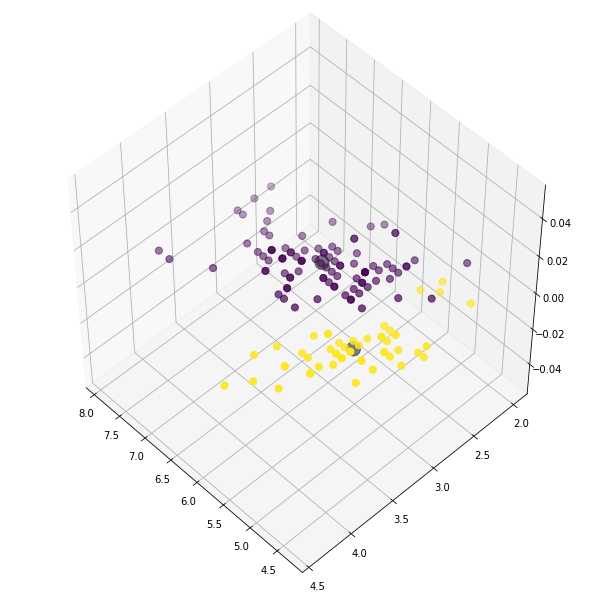

In [16]:
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=136)
ax.scatter(x['Sepal Length'], x['Sepal Width'], c=predicted, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Determination of optimal number of cluster for k-means.

### Elbow method

K-means algorithm clusters the data into k clusters, even if k is not the appropriate number of clusters to use. Therefore, we need to use some way to determine the right number of clusters so that our model groups the data with maximum accuarcy.

One method to validate the number of clusters is the elbow method. The idea behind the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the sum of squared errors (SSE). 

We can find the appropriate number of clusters by plotting a curve between SSE and the value of k. Actually, we visualize the curve as a human hand and thus, the point which is analogous to the human elbow is the appropriate number of clusters.

### Exercise 7
1. Take the range of K from 1 to 15.
2. Loop through the values of K, create a KMeans model, km and also train the model in the loop.
2. In the list Sum_of_squared_distances, append km.inertia_. [Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster and the closer all the points are.)]

In [20]:
Sum_of_squared_distances = []
K = range(1,15)
### Loop through the values of K and create a model.
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

# YOUR CODE HERE


In [ ]:
### INTENTIONALLY LEFT BLANK ###

Let's now plot an elbow curve on our data and find the appropriate number of clusters. 

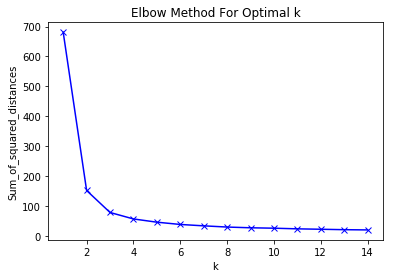

In [21]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Exercise 8
Determine the optimal number of clusters from the above elbow curve.

In [22]:
optimal_k =3
# YOUR CODE HERE


In [ ]:
### INTENTIONALLY LEFT BLANK ###

### Exercise 9
1. Create KMeans estimator using this optimal value of k.
2. Predict the results using the new KMeans object.

In [28]:
new_kmeans = KMeans(n_clusters=optimal_k)

new_predicted =new_kmeans.fit(x).predict(x)
# YOUR CODE HERE
new_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
### INTENTIONALLY LEFT BLANK ###

### Exercise 10
Plot a kmeans scatter plot on Sepal Length and Sepal Width for the new prediction.(Use the same parameters we used while plotting a scatter plot with cluster_size=2)

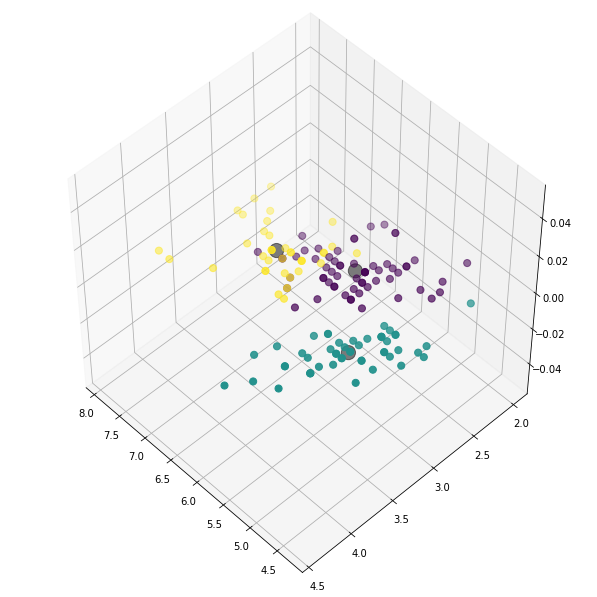

In [29]:
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=136)
# YOUR CODE HERE
ax.scatter(x['Sepal Length'],x['Sepal Width'],c=new_predicted,s=50,cmap = 'viridis')
centers = new_kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
### INTENTIONALLY LEFT BLANK ###

Congratulations on visualizing the clustering on iris dataset using k-means.